In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aisa\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
filepath = "./GEO Samples/Normalized_samples_with_lables.csv"
data = pd.read_csv(filepath)
data

,Stage,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,2,-0.164348,-1.076661,-1.118852,-1.157105,-0.822213,-0.867868,-0.762502,-0.918312,-1.053758,...,-0.882020,-0.871013,-0.549020,-0.989153,-0.868041,-0.868627,-1.010552,-0.988115,-0.980075,-0.928855
1,2,0.750389,-0.790346,-0.908027,-0.858152,-0.912522,-0.962630,-0.750834,-0.912895,-0.780356,...,-1.057043,-1.120578,-0.594082,-1.145224,-0.987874,-1.035385,-0.876960,-1.069330,-0.972754,-1.389988
2,1,-1.993822,-0.888716,-1.066203,-1.037252,-0.935897,-0.894230,-0.758434,-1.133717,-1.103246,...,-1.165102,-1.042417,-0.563510,-1.038490,-1.078039,-0.991126,-1.374537,-1.268033,-1.170155,-1.437559
3,2,-0.469260,-1.248156,-1.265485,-1.115520,-0.991275,-1.169064,-0.770609,-1.449806,-1.233351,...,-1.037993,-1.097711,-0.602768,-1.341785,-1.185941,-1.054998,-1.086203,-1.214582,-1.237836,-1.579811
4,3,-1.383997,-1.325639,-1.317321,-0.884719,-0.961834,-1.128097,-0.874402,-1.006577,-1.050592,...,-0.517833,-0.908455,-0.586513,-0.438422,-0.784382,-0.926567,-0.518030,-0.935352,-0.753721,-0.715591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,-0.164348,0.736856,1.201849,0.954418,0.854311,0.800175,0.754219,0.871933,0.756359,...,1.208008,1.107944,0.971090,1.878045,1.394419,0.954407,1.610727,1.323157,0.912839,1.432849
996,0,0.597933,-0.061326,0.100985,-0.042969,0.727147,-0.169675,0.324917,0.049898,1.200774,...,0.215387,1.179034,0.478115,0.451805,0.228034,0.511640,0.189650,0.579140,0.258313,0.651965
997,0,-0.164348,2.656346,1.903610,1.668044,1.940528,1.789543,0.807435,1.804617,1.814725,...,2.216637,2.131397,1.037168,1.197594,2.089783,1.652731,1.957094,1.971135,1.297010,1.705117
998,0,-0.164348,1.966132,1.344960,1.363761,0.185469,1.315331,0.387489,1.306277,1.644349,...,1.480922,0.188155,-0.141364,1.451527,0.720219,0.195025,1.511185,0.623647,0.112604,0.861334


In [3]:
yy = data.loc[:, data.columns == 'Stage']
y = yy.head(700)
y

,Stage
0,2
1,2
2,1
3,2
4,3
...,...
695,1
696,3
697,1
698,3


In [4]:
xx = data.loc[:, data.columns != 'Stage']
x = xx.head(700)
x

,Age,MIMAT0004501,MIMAT0002844,MIMAT0002843,MIMAT0002824,MIMAT0002823,MIMAT0002807,MIMAT0002806,MIMAT0001635,MIMAT0001631,...,MIMAT0022965,MIMAT0022948,MIMAT0027678,MIMAT0027677,MIMAT0027662,MIMAT0027661,MIMAT0027646,MIMAT0027645,MIMAT0027630,MIMAT0027629
0,-0.164348,-1.076661,-1.118852,-1.157105,-0.822213,-0.867868,-0.762502,-0.918312,-1.053758,-0.357984,...,-0.882020,-0.871013,-0.549020,-0.989153,-0.868041,-0.868627,-1.010552,-0.988115,-0.980075,-0.928855
1,0.750389,-0.790346,-0.908027,-0.858152,-0.912522,-0.962630,-0.750834,-0.912895,-0.780356,-0.306962,...,-1.057043,-1.120578,-0.594082,-1.145224,-0.987874,-1.035385,-0.876960,-1.069330,-0.972754,-1.389988
2,-1.993822,-0.888716,-1.066203,-1.037252,-0.935897,-0.894230,-0.758434,-1.133717,-1.103246,-0.441110,...,-1.165102,-1.042417,-0.563510,-1.038490,-1.078039,-0.991126,-1.374537,-1.268033,-1.170155,-1.437559
3,-0.469260,-1.248156,-1.265485,-1.115520,-0.991275,-1.169064,-0.770609,-1.449806,-1.233351,-0.436639,...,-1.037993,-1.097711,-0.602768,-1.341785,-1.185941,-1.054998,-1.086203,-1.214582,-1.237836,-1.579811
4,-1.383997,-1.325639,-1.317321,-0.884719,-0.961834,-1.128097,-0.874402,-1.006577,-1.050592,-0.416436,...,-0.517833,-0.908455,-0.586513,-0.438422,-0.784382,-0.926567,-0.518030,-0.935352,-0.753721,-0.715591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-1.536453,-0.680225,-0.458461,-0.505099,-0.366597,-0.489308,-0.538732,-0.344373,-0.765886,-0.103712,...,-0.637986,-0.308754,-0.483163,-0.177713,-0.855577,-0.422699,-0.801290,-0.547901,-0.229940,0.112980
696,0.064337,-1.279088,-1.017814,-0.606377,-0.436871,-0.717692,-0.532110,-0.711120,-0.875003,-0.208191,...,-1.184160,-0.447846,-0.423235,-1.274040,-0.957860,-0.388412,-0.814553,-0.497415,-0.543895,-0.518810
697,-0.316804,-1.074191,-0.678578,-0.960265,-0.824569,-0.941049,-0.646004,-0.812128,-0.918514,-0.374215,...,-1.141353,-0.606790,-0.573813,-1.355075,-1.138345,-0.767861,-1.124315,-1.015568,-1.014266,-0.635917
698,0.293021,-1.142847,-0.990164,-1.011076,-0.550786,-0.820338,-0.465550,-0.951941,-0.748507,-0.369262,...,-1.180819,-0.572055,-0.521833,-1.451875,-0.868381,-0.825293,-1.125672,-0.817633,-0.614595,-0.719557


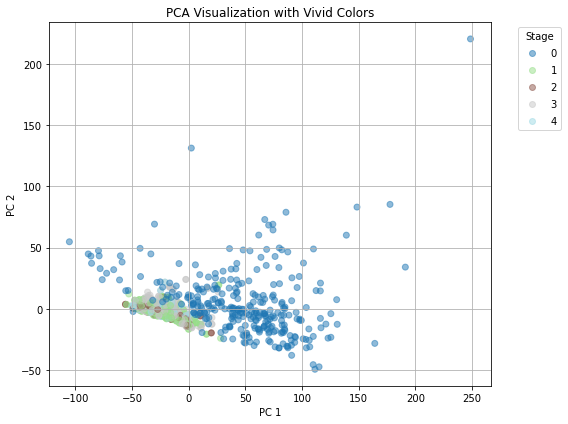

In [5]:
# PCA on all data
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(xx)


# Plot PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    x_pca[:, 0], x_pca[:, 1],
    c=yy["Stage"],
    cmap='tab20',        # Try 'Set1', 'tab20', or 'nipy_spectral' for more color variety
    alpha=0.5           # Higher opacity
)
plt.legend(*scatter.legend_elements(), title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA Visualization with Vivid Colors")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()

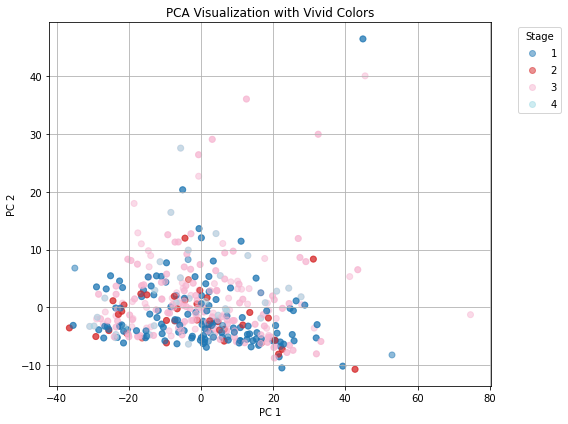

In [6]:
# PCA on cancerous data

from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)


# Plot PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    x_pca[:, 0], x_pca[:, 1],
    c=y["Stage"],
    cmap='tab20',        # Try 'Set1', 'tab20', or 'nipy_spectral' for more color variety
    alpha=0.5           # Higher opacity
)
plt.legend(*scatter.legend_elements(), title="Stage", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PCA Visualization with Vivid Colors")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()

1.Mutual Information
--------------------

Captures nonlinear relationships between features and labels.

In [7]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Select top k features based on mutual information
k = 100  # Number of features to keep
selector = SelectKBest(score_func=mutual_info_classif, k=k)
x_selected = selector.fit_transform(x, y["Stage"])
x_selected

array([[-0.99428378, -0.68182444, -1.08519295, ..., -0.62063604,
        -0.86095114, -0.78304171],
       [ 0.55111674, -0.66620952, -0.86094281, ..., -0.83609183,
        -0.8545879 , -0.80063416],
       [-1.0213552 , -0.7250866 , -0.89076218, ..., -0.82591857,
        -0.9892972 , -0.81378468],
       ...,
       [-0.59936577, -0.538505  , -0.76148173, ..., -0.4308839 ,
        -1.02693368, -0.63331815],
       [-1.09165351, -0.36783897, -0.97829514, ..., -0.19944629,
        -1.23508754, -0.56194995],
       [-0.90855352, -0.18353438, -0.53667801, ..., -0.23914179,
        -0.72880262,  0.79555036]])

In [8]:
# To get selected feature indices:
selected_indices = selector.get_support(indices=True)
selected_indices

array([  10,   28,   32,   49,   76,  150,  166,  195,  223,  251,  259,
        308,  363,  372,  397,  404,  431,  434,  475,  486,  497,  554,
        574,  579,  630,  672,  730,  731,  736,  741,  745,  763,  766,
        788,  823,  833,  923,  929,  962,  985, 1009, 1014, 1017, 1092,
       1102, 1128, 1132, 1140, 1171, 1178, 1179, 1186, 1256, 1266, 1286,
       1308, 1313, 1316, 1317, 1346, 1349, 1389, 1400, 1483, 1505, 1511,
       1522, 1575, 1599, 1665, 1680, 1699, 1712, 1801, 1834, 1847, 1869,
       1875, 1897, 1928, 1950, 1976, 1997, 2069, 2082, 2091, 2097, 2193,
       2214, 2219, 2256, 2297, 2382, 2412, 2444, 2456, 2475, 2481, 2488,
       2526], dtype=int64)

2.ANOVA F-test
-----------------

Works best with normally distributed features (which z-score normalization helps with).

In [9]:
from sklearn.feature_selection import f_classif, SelectKBest

k = 100
selector = SelectKBest(score_func=f_classif, k=k)
x_selected = selector.fit_transform(x, y["Stage"])
x_selected

array([[-0.16434776, -0.63475399, -0.55508971, ..., -0.5245934 ,
        -0.84917878, -0.98007473],
       [ 0.75038931, -0.75573301, -0.66570713, ..., -0.56828589,
        -1.05268965, -0.97275357],
       [-1.99382191, -0.66714669, -0.58660871, ..., -0.55542762,
        -0.89264425, -1.17015467],
       ...,
       [-0.31680394, -0.66332048, -0.56132984, ..., -0.39609788,
        -0.85010313, -1.01426632],
       [ 0.29302078, -0.62532583, -0.4811361 , ..., -0.37042062,
        -0.63034634, -0.61459465],
       [-0.31680394, -0.36715497, -0.1253095 , ..., -0.11629645,
        -0.16690769,  0.05359257]])

3.Random Forest
-----------------------------------


In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(x, y["Stage"])

# Get feature importances and select top k
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort descending

top_k = 100
top_indices = indices[:top_k]
rf_x_selected = x.iloc[:, top_indices]
rf_x_selected

,MIMAT0019711,MIMAT0027670,MIMAT0022742,Age,MIMAT0005891,MIMAT0027656,MIMAT0027558,MIMAT0018976,MIMAT0019896,MIMAT0027570,...,MIMAT0005793,MIMAT0004792,MIMAT0000075,MIMAT0027638,MIMAT0022942,MIMAT0019971,MIMAT0019974,MIMAT0028109,MIMAT0019849,MIMAT0028211
0,-0.779792,-0.733370,-0.767974,-0.164348,-0.961288,-1.221328,-0.754905,-0.471810,-1.132187,-0.783626,...,-0.749822,-0.816134,-1.022869,-0.543202,-0.585898,-0.727870,-0.542284,-0.644874,-0.656943,-0.559903
1,-0.772931,-0.645403,-0.694620,0.750389,-1.021238,-1.311709,-0.781339,-0.585097,-0.707427,-0.996940,...,-0.360090,-0.932818,-1.240977,-0.557765,-0.588265,0.891729,-0.874008,-0.585752,-0.629689,-0.550440
2,-0.739366,-0.554121,-0.861629,-1.993822,-0.908221,-1.250903,-0.771285,-1.083725,-1.232802,-0.843026,...,-0.819651,-0.817756,-1.117140,-0.403748,-0.535524,-1.241412,-1.110068,-0.671155,-0.624395,-0.509348
3,-1.038840,-1.084816,-0.839412,-0.469260,-1.131735,-1.165491,-0.800883,-0.918407,-1.149137,-1.036857,...,-0.908996,-0.838536,-1.098240,-0.651163,-0.601245,-1.078442,-1.034726,-0.705977,-0.675480,-0.583233
4,-0.895595,-0.485611,-0.747514,-1.383997,-1.042475,-1.385446,-0.840928,-0.809000,-1.156895,-0.944400,...,-0.778516,-0.727978,-1.210107,-0.540932,-0.534877,-1.061105,-1.199546,-0.612631,-0.654418,-0.537784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.312008,-0.485342,-0.234146,-1.536453,-0.679681,0.057843,-0.442844,0.430276,-0.110832,-0.325440,...,-0.395337,-0.537143,-0.834800,-0.523310,-0.161139,-0.887442,-0.751808,-0.170126,-0.045261,-0.087454
696,-0.078568,-0.105510,-0.389451,0.064337,-0.970321,-0.405185,-0.328956,0.445328,1.467382,0.272593,...,-0.447733,-0.358989,-0.929054,-0.231974,-0.003471,-1.016122,-1.038376,-0.225566,0.096885,0.006799
697,-0.844728,-0.967503,-0.531053,-0.316804,-0.705777,-0.839879,-0.556951,-0.164865,-0.511687,-0.966435,...,-0.741740,-0.556000,-1.070822,-0.647037,-0.502100,-0.736567,-0.854095,-0.522585,-0.407180,-0.489662
698,0.154307,-0.163039,-0.399281,0.293021,-0.916056,-0.953293,-0.454510,-0.131341,-0.783695,-0.355691,...,-0.743829,-0.302760,-1.078908,-0.470063,-0.340217,-1.055586,-0.809980,-0.412231,-0.378374,-0.364798


Combine methods
----------------------

In [11]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

k = 100
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
x_mi_selected = mi_selector.fit_transform(x, y["Stage"])

# Get the actual indices of selected features
mi_indices = mi_selector.get_support(indices=True)
mi_indices

array([  10,   28,   32,   49,   76,  150,  166,  195,  223,  251,  259,
        308,  363,  372,  397,  404,  431,  434,  475,  486,  497,  554,
        574,  579,  630,  672,  731,  736,  741,  745,  763,  766,  788,
        823,  833,  923,  929,  962,  985, 1007, 1009, 1014, 1017, 1092,
       1102, 1128, 1132, 1140, 1171, 1178, 1186, 1256, 1266, 1286, 1308,
       1313, 1316, 1317, 1346, 1349, 1367, 1389, 1400, 1483, 1505, 1511,
       1522, 1547, 1575, 1599, 1665, 1680, 1699, 1712, 1801, 1834, 1847,
       1869, 1875, 1897, 1928, 1950, 1976, 1997, 2069, 2082, 2091, 2097,
       2193, 2219, 2256, 2297, 2382, 2412, 2444, 2456, 2475, 2481, 2488,
       2526], dtype=int64)

In [12]:
#rain Random Forest on full data and get feature importances

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(x, y["Stage"])
importances = rf.feature_importances_
importances

array([0.00333861, 0.00119464, 0.00015374, ..., 0.00026199, 0.00039801,
       0.0001594 ])

In [13]:
# Get top k feature indices by model importance
top_k_model_indices = np.argsort(importances)[::-1][:k]

# Compare overlap
overlap = set(mi_indices) & set(top_k_model_indices)
print(f"Overlap count: {len(overlap)} out of {k}")
print(f"Overlap indices: {sorted(overlap)}")


Overlap count: 8 out of 100
Overlap indices: [76, 308, 363, 1007, 1286, 1317, 1665, 2193]


In [19]:
# Convert to sorted list (optional, for ordered output)
overlap_sorted = sorted(overlap)

# Get corresponding feature names
overlap_feature_names = x.columns[overlap_sorted]

# Display or use them
print(overlap_feature_names)

Index(['MIMAT0030999', 'MIMAT0022694', 'MIMAT0021038', 'MIMAT0018975',
       'MIMAT0005891', 'MIMAT0021127', 'MIMAT0031180', 'MIMAT0019711'],
      dtype='object')


In [14]:
# Select columns that are in both MI and model top-k
x_validated = x.iloc[:, sorted(overlap)]
x_validated

,MIMAT0030999,MIMAT0022694,MIMAT0021038,MIMAT0018975,MIMAT0005891,MIMAT0021127,MIMAT0031180,MIMAT0019711
0,-0.555090,-0.922879,-0.391624,-0.860302,-0.961288,-0.944579,-0.511980,-0.779792
1,-0.665707,-0.911952,-0.655819,-1.030385,-1.021238,-1.062676,-0.643382,-0.772931
2,-0.586609,-0.933655,-0.740670,-1.219186,-0.908221,-1.002504,-0.835946,-0.739366
3,-0.622311,-1.019726,-0.915634,-1.264090,-1.131735,-1.130105,-0.776287,-1.038840
4,-0.601891,-0.776322,-0.960952,-1.191694,-1.042475,-0.958190,-0.669345,-0.895595
...,...,...,...,...,...,...,...,...
695,-0.534023,-0.666649,-0.906350,-1.007409,-0.679681,0.129415,0.357083,-0.312008
696,-0.386721,-0.542098,-0.780874,-1.010391,-0.970321,0.324638,-0.013265,-0.078568
697,-0.561330,-0.628595,-0.624342,-0.846837,-0.705777,-0.885130,-0.468942,-0.844728
698,-0.481136,-0.541630,-0.998189,-1.380364,-0.916056,-0.396294,-0.342072,0.154307


In [15]:
filepath = "./GEO Samples/dimension_reduced_cancer_data.csv"
x_validated.to_csv(filepath, index=False)

In [16]:
filepath = "./GEO Samples/dimension_reduced_cancer_data_lables.csv"
y.to_csv(filepath, index=False)

In [17]:
# Classification using XGboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# 1. Encode labels to 0-based integers
from pandas.api.types import is_numeric_dtype

# y is a DataFrame with a 'Stage' column
le = LabelEncoder()
y_encoded = le.fit_transform(y["Stage"])

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    x, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 3. Train XGBoost classifier
model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=len(le.classes_),  # Number of unique classes
    eval_metric="mlogloss",
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test)
print("Classification for Cancer data Only (Stage 1 -4)")
print(classification_report(y_test, y_pred))

# 5. (Optional) Convert predictions back to original labels
y_pred_original = le.inverse_transform(y_pred)


C:\Users\aisa\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [17:29:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.82      0.92      0.87        53
           1       1.00      0.67      0.80        15
           2       0.81      0.79      0.80        66
           3       0.00      0.00      0.00         6

    accuracy                           0.79       140
   macro avg       0.66      0.59      0.62       140
weighted avg       0.80      0.79      0.79       140



In [18]:
print("Classification for Cancer data Only (Stage 1 -4)")
print(classification_report(y_test, y_pred))

Classification for Cancer data Only (Stage 1 -4)
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        53
           1       1.00      0.67      0.80        15
           2       0.81      0.79      0.80        66
           3       0.00      0.00      0.00         6

    accuracy                           0.79       140
   macro avg       0.66      0.59      0.62       140
weighted avg       0.80      0.79      0.79       140

